<a href="https://colab.research.google.com/github/AkyLast/Breast-Cancer-Analysis/blob/main/Breast-Cancer-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [10]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [11]:
df = pd.read_csv("Breast_Cancer.csv")
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Classification
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Analisando o Conjunto de dados e escolhendo o pré-processamento

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Classification
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df["Classification"].value_counts()

,count
Classification,
1,357
0,212


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Análise da Correlação entre as colunas em si

In [15]:
matriz_corr = df.corr()
matriz_corr["Classification"].sort_values(ascending = False)

,Classification
Classification,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


## Colunas com números de correlação baixa

- mean fractal dimension = 0.012838
- texture error = 0.008303
- smoothness error = 0.067016
- symmetry error = 0.006522
- fractal dimension error = -0.077972

Há uma possível chances que estas estejam atrapanhando o modelo.

In [16]:
X = df.drop("Classification", axis = 1)
y = df["Classification"]

X_notLigation = df.drop(["mean fractal dimension", "texture error", "smoothness error", "symmetry error", "fractal dimension error"], axis = 1)

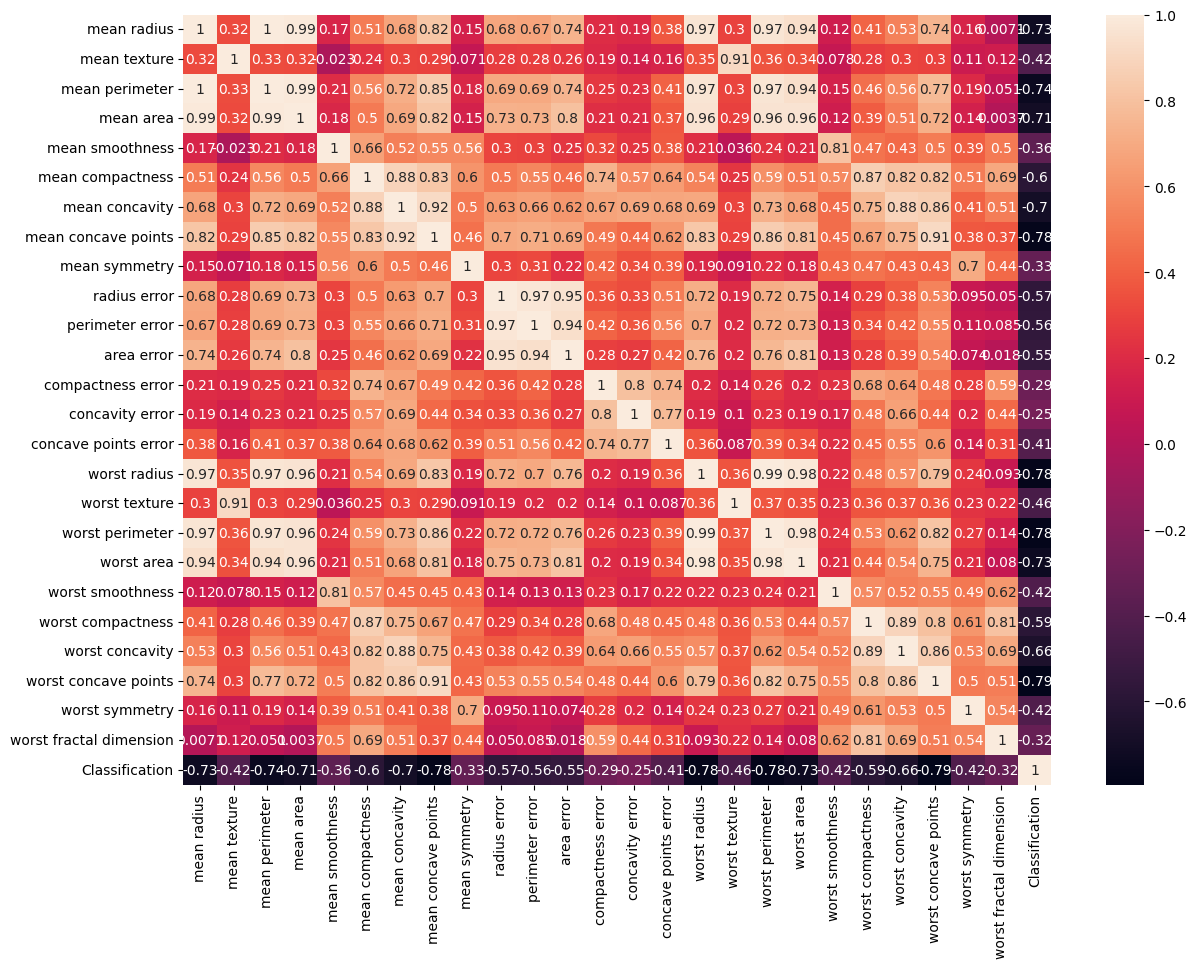

In [17]:
plt.figure(figsize = (14, 10))
sns.heatmap(X_notLigation.corr(), annot = True)
plt.show()

## Separando os datasets para o treinamento
Dividido em:
1. train e test puro, sem nenhuma modificação.
2. train e test escalonado, pré-processado
3. train e test sem colunas com baixa correlação, puro e sem escalonamento.
4.train test sem colunas com baixa correlação escalonada, pré-processada.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_notLig, X_test_notLig, y_train_notLig, y_test_notLig = train_test_split(X_notLigation, y, test_size = 0.2, random_state = 42)

X_trainNotLig_scaled = scaler.fit_transform(X_train_notLig)
X_testNotLig_scaled = scaler.fit_transform(X_test_notLig)

#### Treinamento de modelo teste

In [19]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acc:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

Acc: 0.956140350877193

               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## Processamento de Analise de Hiperparâmetro e pré-processamento

In [20]:
param = list(range(1, 200, 4))

model_score_scaled = []
model_score_notLig_scaled = []
model_score_unscaled = []
model_score_notLig_unscaled = []

for k in param:
  model_unscaled = KNeighborsClassifier(n_neighbors = k)
  model_unscaled.fit(X_train, y_train)

  y_pred_unscaled = model_unscaled.predict(X_test)
  model_score_unscaled.append(accuracy_score(y_test, y_pred_unscaled))

  # -Uncorrelated
  model_notLig_unscaled = KNeighborsClassifier(n_neighbors = k)
  model_notLig_unscaled.fit(X_train_notLig, y_train_notLig)

  y_pred_notLig_unscaled = model_notLig_unscaled.predict(X_test_notLig)
  model_score_notLig_unscaled.append(accuracy_score(y_test_notLig, y_pred_notLig_unscaled))

  #pré-processamento
  model_scaled = KNeighborsClassifier(n_neighbors = k)
  model_scaled.fit(X_train_scaled, y_train)

  y_pred_scaled = model_scaled.predict(X_test_scaled)
  model_score_scaled.append(accuracy_score(y_test, y_pred_scaled))

  # -Uncorrelated
  model_notLig_scaled = KNeighborsClassifier(n_neighbors = k)
  model_notLig_scaled.fit(X_trainNotLig_scaled, y_train_notLig)

  y_pred_notLig_scaled = model_notLig_scaled.predict(X_testNotLig_scaled)
  model_score_notLig_scaled.append(accuracy_score(y_test_notLig, y_pred_notLig_scaled))

# Analise gráfica de desempenho do aprendizado

---



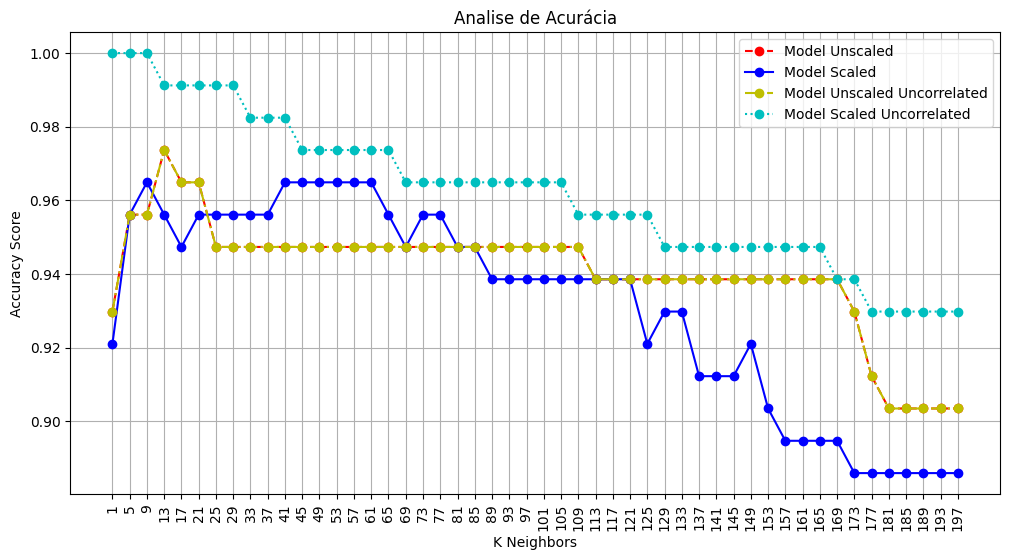

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(param, model_score_unscaled, marker = "o", linestyle = "--", color = "r", label = "Model Unscaled")
plt.plot(param, model_score_scaled, marker = "o", linestyle = "-", color = "b", label = "Model Scaled")
plt.plot(param, model_score_notLig_unscaled, marker = "o", linestyle = "-.", color = "y", label = "Model Unscaled Uncorrelated")
plt.plot(param, model_score_notLig_scaled, marker = "o", linestyle = ":", color = "c", label = "Model Scaled Uncorrelated")
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Analise de Acurácia")
plt.legend()
plt.xticks(param, rotation = 90)
plt.grid(True)
plt.show()

## Treinamento do Modelo com o melhor hiperparâmetro e processamento analisado

In [24]:
# Treino com o dataset completo

X = scaler.fit_transform(X_notLigation)
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X, y)

y_pred = model.predict(X_testNotLig_scaled)
accuracy = accuracy_score(y_test_notLig, y_pred) * 100
print(f"Acc: {accuracy:.2f}%")
print("\n",classification_report(y_test_notLig, y_pred))

Acc: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

